# Importing the required libraries

In [84]:
%matplotlib inline

#numpy for computations
import numpy as np
from numpy import cos, sin, pi, exp 
np.set_printoptions(precision=5)


#matplotlib for plotting and animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import cm

#to play the animation as a video
from IPython.display import HTML

* HTML module from Ipython.display and ffmpeg is used to convert the animation into a
video and make it playable in the notebook.
* `ipython` can be installed using `pip by pip3 install ipython` and `ffmpeg` can be installed
inside the python environment using `sudo apt install ffmpeg`.

# Making some helpful functions

## Evaluating a list of functions for a given argument

In [85]:
##evaluating a list of functions

def evaluate_func_list(func_list,point):
    a=[]

    #evaluating each function i at a with arguments as values in the tuple point
    for i in func_list:
        a.append(i(*point))
    return np.array(a)

In the above cell, a function called `evaluate_func_list()` is defined, which takes the arguments as a list of functions (`func_list`) and a point (`point`) (as a tuple). It returns a numpy array of values after evaluating each function in the list at the given point.

## Calculating the derivative of a single variable function

In [86]:
#differtiation of a single variable function
class Derivative:
    def __init__(self, func):
        self.f=func
    
    def __call__(self, x):
        f=self.f
        h=1e-6
        return (f(x+h)-f(x))/h

* In the above cell, we define a class named `Derivative` to calcluate the derivative of a given single variable function.
* For a given single variable function `f`, `Derivative(f)` returns the derivative of the function, using the first principle.

# Creating a general function `gradient_descent()`

In the cell below the `gradient_descent()` function is defined, with arguments:
* `func`:           the actual function
* `deri_func_list`: derivative function list
* `start`:          a tuple of initial conditions 
* `limits`:         a nested list containing the ranges of individual arguments of the function
* `lr`:             learning rate
* `n_iterations`:   number of iterations, default:10000

This returns the inputs that minimize the value of the given function as a `numpy` array.

In [87]:
#arguments of the gradient_descent() function
'''
func:           the actual function
deri_func_list: derivative function list
start:          a tuple of initial conditions 
limits:         a nested list containing the ranges of individual arguments of the function
lr:             learning rate
n_iterations:   number of iterations
'''

def gradient_descent(func, start_point, lr, limits,deri_func_list,n_iterations=10000):
    start=np.array(start_point)
    soln=np.copy(start)

    
    #this section checks if the number of variables in the function is consistent with
    #the number of the elements in derivative function list and the tuple containing the inital conditions

    if  func.__code__.co_argcount!=len(deri_func_list):
        print("Please enter the correct number of partial derviatives.")
    elif func.__code__.co_argcount!=len(start):
        print("Enter the right starting point")
    elif func.__code__.co_argcount!=len(limits):
        print("Enter the the range for the right number of elements")
    else:

        #the actual gradient descent happens here
        for i in range(n_iterations):

            #this makes sure that the elements in the start tuple stay within the given limits 
            for num in range(len(limits)):
                if start[num]>limits[num][1]: start[num]=limits[num][1]
                if start[num]<limits[num][0]: start[num]=limits[num][0]
            
            
            #to see the output after each iteration
            '''
            print(f"Before iteration {i+1}:",end='')
            print(start)
            print("Function value: ",end='')
            print(func(*start))
            print()
            '''
            soln =start-evaluate_func_list(deri_func_list,start)*lr
            start=np.copy(soln)
    
    #the solution array is returned
    return soln


# Problem 1 - 1-D simple polynomial

The gradient is not specified.  You can write the function for gradient on your own.  The range within which to search for minimum is [-5, 5].


## Function definition

In [88]:
#given polynomial
def f1(x):
    return x ** 2 + 3 * x + 8

## Calling the `gradient_descent()` and printing the outputs

* The `gradient_descent()` function is called on function `f1`, with starting point as `x = 14` with a learning rate of 0.006.
* The argument `limits` contains a list that mentions the range of x values over which the minimization is to be performed and the argument `deri_func_list` contains `Derivative(f1)`.
* It returns the value of $x$ for which $f(x)$ is minimum in the given range.

In [89]:
gradient_descent(func=f1,start_point=(14,),lr=0.006,limits=[[-5,5]],deri_func_list=[Derivative(f1)])

array([-1.5])

## Creating the animated plot

* The cell below creates an animation showing how the gradient descent algorithm when applied to the starting point approaches the optimal value as the number of iterations are increased.
* The `gradient_descent()` function is called on function `f1`, with starting point as `x = 14` with a learning rate of 0.006.
* The animation has 100 frames with interval between each frame as 1 second.
* The line `HTML(ani.to_html5_video())` converts the animation object into a video and makes it playable in the python notebook.

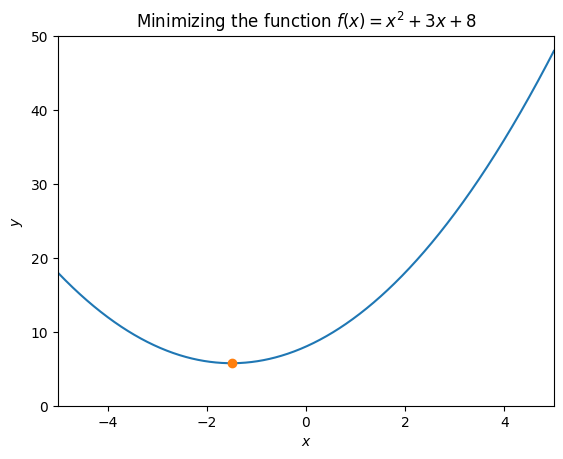

In [90]:
#initalizing the plot
fig, ax = plt.subplots()

#defining array of x values in the given range
x_coord=np.linspace(-5,5,1000)


#setting up x-limits as -5 to 5 and y-limits as 0 to 50
ax.axis([-5,5,0,50])
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Minimizing the function $f(x)=x^{2}+3x+8$')

#plotting the given function
ax.plot(x_coord,f1(x_coord))


# create a point in the axes (it is the starting point)
point, = ax.plot(14,f1(14), marker="o")

def update(num):

    # obtain point coordinates 
    x,= gradient_descent(func=f1,start_point=(14,),lr=0.06,limits=[[-5,5]],deri_func_list=[Derivative(f1)],n_iterations=int(num))

    # set the coordinates of the point
    point.set_data([x],[f1(x)])
    return point,

#creating the animation using the update function
ani = FuncAnimation(fig, update, interval=1000, blit=True, repeat=True,frames=range(100))

#converting it into video format
HTML(ani.to_html5_video())


# Problem 2 - 2-D polynomial

Functions for derivatives, as well as the range of values within which to search for the minimum, are given.

## Function definition and partial derivatives

In [91]:
xlim3 =  [-10, 10]
ylim3 =  [-10, 10]
def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(x, y):
    return 2*y - 4

## Calling the `gradient_descent()` and printing the outputs

* The `gradient_descent()` function is called on function `f3`, with starting point as `(x,y) = (15,15)` with a learning rate of 0.006.
* The argument `limits` contains a list that mentions the range of x values over which the minimization is to be performed and the argument `deri_func_list` is a list containing the elements `df3_dx`,`df3_dy`, which are the partial derivatives of the function `f3`.
* It returns the value of $x$ and $y$ for which $f(x,y)$ is minimum in the given range.

In [92]:
gradient_descent(func=f3,start_point=(-10,-10),lr=0.006,limits=[[-10,10],[-10,10]],deri_func_list=[df3_dx,df3_dy])

array([4.04557, 2.     ])

## Creating the animated plot

* The cell below creates an animation showing how the gradient descent algorithm when applied to the starting point approaches the optimal value as the number of iterations are increased.
* The `gradient_descent()` function is called on function `f3`, with starting point as `(x,y) = (-10,-10)` with a learning rate of 0.01.
* The animation has 500 frames with interval between each frame as 0.1 seconds.
* The line `HTML(ani.to_html5_video())` converts the animation object into a video and makes it playable in the python notebook.

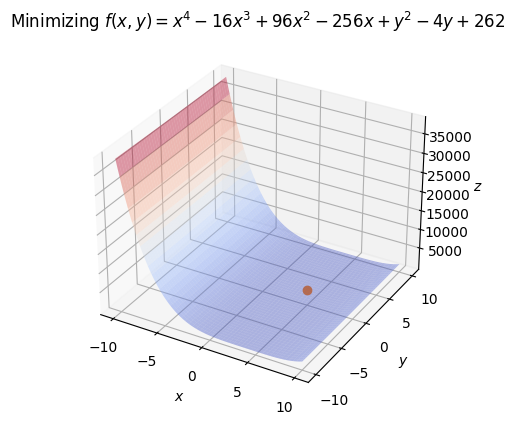

In [93]:
#setting up the figure
fig2 = plt.figure()
ax2 = plt.axes(projection='3d')

#settiing up titles and labels
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_zlabel('$z$')
ax2.set_title('Minimizing $f(x,y)=x^{4}-16x^{3}+96x^{2}-256x+y^{2}-4y+262$')


#creating arrays of x-values and y-values and creating a 'mesh' of them
x_coord2=np.linspace(-10,10,100)
y_coord2=np.linspace(-10,10,100)
X,Y=np.meshgrid(x_coord2,y_coord2)

#making the surface plot of the given function with a transparency of 0.4
ax2.plot_surface(X,Y,f3(X,Y),alpha=0.4,cmap=cm.coolwarm)

#plotting the initial point (-10,-10)
points2, = ax2.plot([-10], [-10], [f3(-10,-10)], 'o')


def update2(num):
    # obtain point coordinates 
    x,y=gradient_descent(func=f3,start_point=(-10,-10),lr=0.01,limits=[[-10,10],[-10,10]],deri_func_list=[df3_dx,df3_dy],n_iterations=num)

    #setting the coordinates of the point
    points2.set_data([x],[y])
    points2.set_3d_properties([f3(x,y)])
    return points2,

#creating animation using the update2 function
ani2 = FuncAnimation(fig2, update2, interval=100, blit=True, repeat=True,frames=range(500))

#converting it into video format
HTML(ani2.to_html5_video())

# Problem 3 - 2-D function 

Derivatives and limits given. 

## Function definition and partial derivatives

In [94]:
xlim4 = [-pi, pi]
def f4(x,y):
    return exp(-(x - y)**2)*sin(y)

def f4_dx(x, y):
    return -2*exp(-(x - y)**2)*sin(y)*(x - y)

def f4_dy(x, y):
    return exp(-(x - y)**2)*cos(y) + 2*exp(-(x - y)**2)*sin(y)*(x - y)

## Calling the `gradient_descent()` and printing the outputs

* The `gradient_descent()` function is called on function `f4`, with starting point as `(x,y) = (0.5,0.5)` with a learning rate of 0.006.
* The argument `limits` contains a list that mentions the range of x values over which the minimization is to be performed and the argument `deri_func_list` is a list containing the elements `f4_dx`,`f4_dy`, which are the partial derivatives of the function `f4`.
* It returns the value of $x$ and $y$ for which $f(x,y)$ has the local minimum in the given range.

In [95]:
gradient_descent(func=f4,start_point=(0.5,0.5),lr=0.006,limits=[[-pi,pi],[-10,10]],deri_func_list=[f4_dx,f4_dy])

array([-1.5708, -1.5708])

## Creating the animated plot

* The cell below creates an animation showing how the gradient descent algorithm when applied to the starting point approaches the optimal value as the number of iterations are increased.
* The `gradient_descent()` function is called on function `f4`, with starting point as `(x,y) = (0.5,0.5)` with a learning rate of 0.06.
* The animation has 500 frames with interval between each frame as 0.1 seconds.
* The line `HTML(ani.to_html5_video())` converts the animation object into a video and makes it playable in the python notebook.


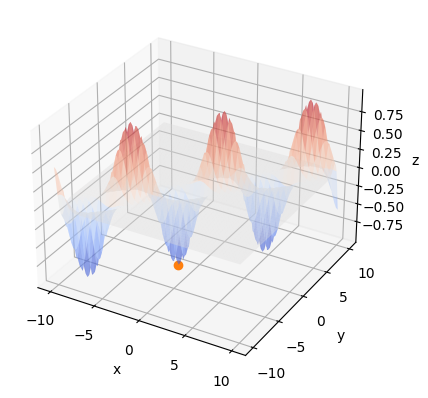

In [96]:
#setting up the plot
fig3 = plt.figure()
ax3= plt.axes(projection='3d')

#setting up the labels and title
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')
ax2.set_title('Minimizing $exp(-(x-y)^{2})\sin{y}$')

#creating arrays of x-values and y-values and creating a 'mesh' of them
x_coord3=np.linspace(-10,10,100)
y_coord3=np.linspace(-10,10,100)
X3,Y3=np.meshgrid(x_coord3,y_coord3)

#making the surface plot of the given function with a transparency of 0.4
ax3.plot_surface(X3,Y3,f4(X3,Y3),alpha=0.4,cmap=cm.coolwarm)

#plotting the initial point (0.5,0.5)
points3, = ax3.plot([0.5], [0.5], [f4(0.5,0.5)], 'o')


def update3(num):
    #obtain coordinates of the point
    x,y=gradient_descent(func=f4,start_point=(0.5,0.5),lr=0.06,limits=[[-pi,pi],[-10,10]],deri_func_list=[f4_dx,f4_dy],n_iterations=num)

    #set the coordinates of the point
    points3.set_data([x],[y])
    points3.set_3d_properties([f4(x,y)])
    return points3,

#creating the animation using update3 function
ani3= FuncAnimation(fig3, update3, interval=100, blit=True, repeat=True,frames=range(500))

#converting it into video 
HTML(ani3.to_html5_video())


# Problem 4 - 1-D trigonometric

Derivative not given.  Optimization range [0, 2*pi]

## Function definition

In [97]:
def f5(x):
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1

## Calling the `gradient_descent()` and printing the outputs

* The `gradient_descent()` function is called on function `f5`, with starting point as `x = 2 ` with a learning rate of 0.006.
* The argument `limits` contains a list that mentions the range of x values over which the minimization is to be performed and the argument `deri_func_list` contains `Derivative(f5)`.
* It returns the value of $x$ for which $f(x)$ has the local minimum in the given range.

In [98]:
gradient_descent(func=f5,start_point=(2,),lr=0.006,limits=[[0,2*pi]],deri_func_list=[Derivative(f5)])

array([1.66166])

## Creating the animated plot

* The cell below creates an animation showing how the gradient descent algorithm when applied to the starting point approaches the optimal value as the number of iterations are increased.
* The `gradient_descent()` function is called on function `f5`, with starting point as `x = 2` with a learning rate of 0.06.
* The animation has 100 frames with interval between each frame as 0.1 seconds.
* The line `HTML(ani.to_html5_video())` converts the animation object into a video and makes it playable in the python notebook.

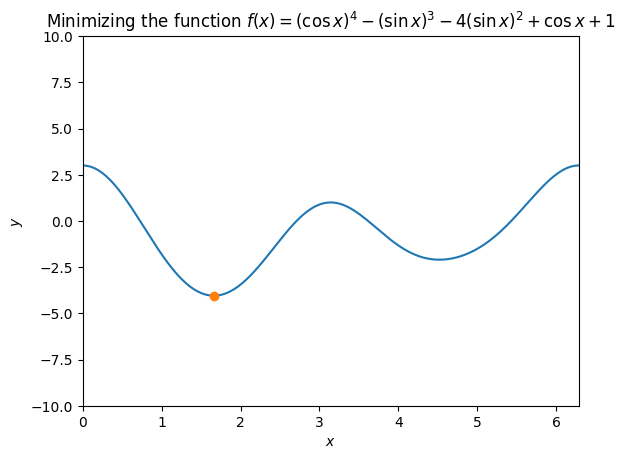

In [99]:
#setting up the plots
fig4, ax4 = plt.subplots()

#setting up the x-value array
x_coord4=np.linspace(0,2*pi,1000)

#setting the axes of the plot
ax4.axis([0,2*pi,-10,10])
ax4.set_xlabel('$x$')
ax4.set_ylabel('$y$')
ax4.set_title('Minimizing the function $f(x)=(\cos{x})^{4}-(\sin{x})^{3}-4(\sin{x})^{2}+\cos{x}+1$')

#plotting the given function curve
ax4.plot(x_coord4,f5(x_coord4))



# create a point in the axes
point, = ax4.plot(2.615,f5(2.615), marker="o")

def update(num):
    # obtain point coordinates 
    x4,=gradient_descent(func=f5,start_point=(2,),lr=0.06,limits=[[0,2*pi]],deri_func_list=[Derivative(f5)],n_iterations=int(num))

    # set point's coordinates
    point.set_data([x4],[f5(x4)])
    return point,

ani4 = FuncAnimation(fig4, update, interval=100, blit=True, repeat=True,frames=range(100))
HTML(ani4.to_html5_video())